# (연구&서연) GODE – Ex2 Kappa에 따른 성능 시각화

최규빈  
2024-08-14

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['text.usetex'] = True

In [5]:
df_bunny = pd.read_csv("~/Dropbox/03_Yechan3/연구/서연이랑/GODE/Bunny_Dataset.csv").rename({'Unnamed: 0':'Method'},axis=1)
df_linear = pd.read_csv("~/Dropbox/03_Yechan3/연구/서연이랑/GODE/Linear_Dataset.csv").rename({'Unnamed: 0':'Method'},axis=1)
df_orbit = pd.read_csv("~/Dropbox/03_Yechan3/연구/서연이랑/GODE/Orbit_Dataset.csv").rename({'Unnamed: 0':'Method'},axis=1)

# Bunny

/tmp/ipykernel_497972/2230919312.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='AUC', data=df_subset, ax=axs[i], palette=colors)
/tmp/ipykernel_497972/2230919312.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(xtick_labels, rotation=45, ha='right', fontsize=12)
/tmp/ipykernel_497972/2230919312.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='AUC', data=df_subset, ax=axs[i], palette=colors)
/tmp/ipykernel_497972/2230919312.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a

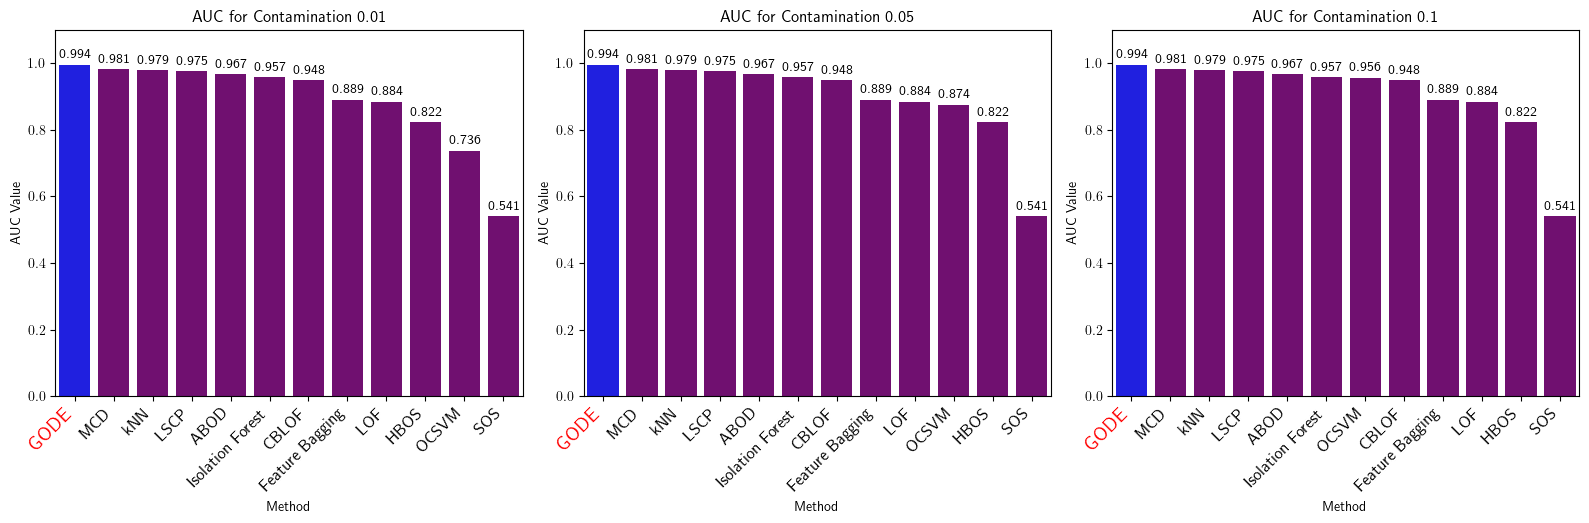

In [45]:
# Save the plots as a PDF
import matplotlib.pyplot as plt
import seaborn as sns

# Create the 1x3 bar plots as requested, focusing on AUC with GODE highlighted and labeled in thicker bold red
fig, axs = plt.subplots(1, 3, figsize=(24*(2/3), 8*(2/3)))

# Filter data based on Contamination values and sort by AUC
contaminations = [0.01, 0.05, 0.10]
highlight_method = 'GODE'

for i, contamination in enumerate(contaminations):
    df_subset = df_bunny[df_bunny['Contamination'] == contamination].sort_values(by='AUC', ascending=False)
    
    # Highlight GODE with a different color
    colors = ['blue' if method == highlight_method else 'purple' for method in df_subset['Method']]
    
    # Plot only AUC with dodge and numbers on top
    sns.barplot(x='Method', y='AUC', data=df_subset, ax=axs[i], palette=colors)
    
    # Add text labels for AUC values
    for j in range(len(df_subset)):
        axs[i].text(j, df_subset['AUC'].values[j] + 0.02, round(df_subset['AUC'].values[j], 3), ha='center')
    
    # Customize the x-tick labels, making GODE bold and red
    xtick_labels = []
    for method in df_subset['Method']:
        if method == highlight_method:
            xtick_labels.append(f"GODE")
        else:
            xtick_labels.append(method)
    axs[i].set_xticklabels(xtick_labels, rotation=45, ha='right', fontsize=12)
    
    for label in axs[i].get_xticklabels():
        if label.get_text() == "GODE":
            label.set_color("red")
            label.set_fontweight("extra bold")  # Set to extra bold to increase thickness
            label.set_fontsize(14)  # Increase font size for more emphasis
    
    axs[i].set_title(f'AUC for Contamination {contamination}')
    axs[i].set_ylabel('AUC Value')
    axs[i].set_ylim(0, 1.1)

plt.tight_layout()

# Save the figure as a PDF
pdf_filename = "./Dropbox/03_Yechan3/연구/서연이랑/GODE/Bunny_Dataset.pdf"
plt.savefig(pdf_filename, format='pdf')
plt.show()

# Linear

/tmp/ipykernel_497972/286785422.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='AUC', data=df_subset, ax=ax, dodge=False, palette=colors)
/tmp/ipykernel_497972/286785422.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='AUC', data=df_subset, ax=ax, dodge=False, palette=colors)
/tmp/ipykernel_497972/286785422.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='AUC', data=df_subset, ax=ax, dodge=False, palette=colors)
/tmp/ipykernel_497972/286785422.py:29: FutureWarning: 

Passing `palette`

'./Dropbox/03_Yechan3/연구/서연이랑/GODE/Linear_Dataset.pdf'

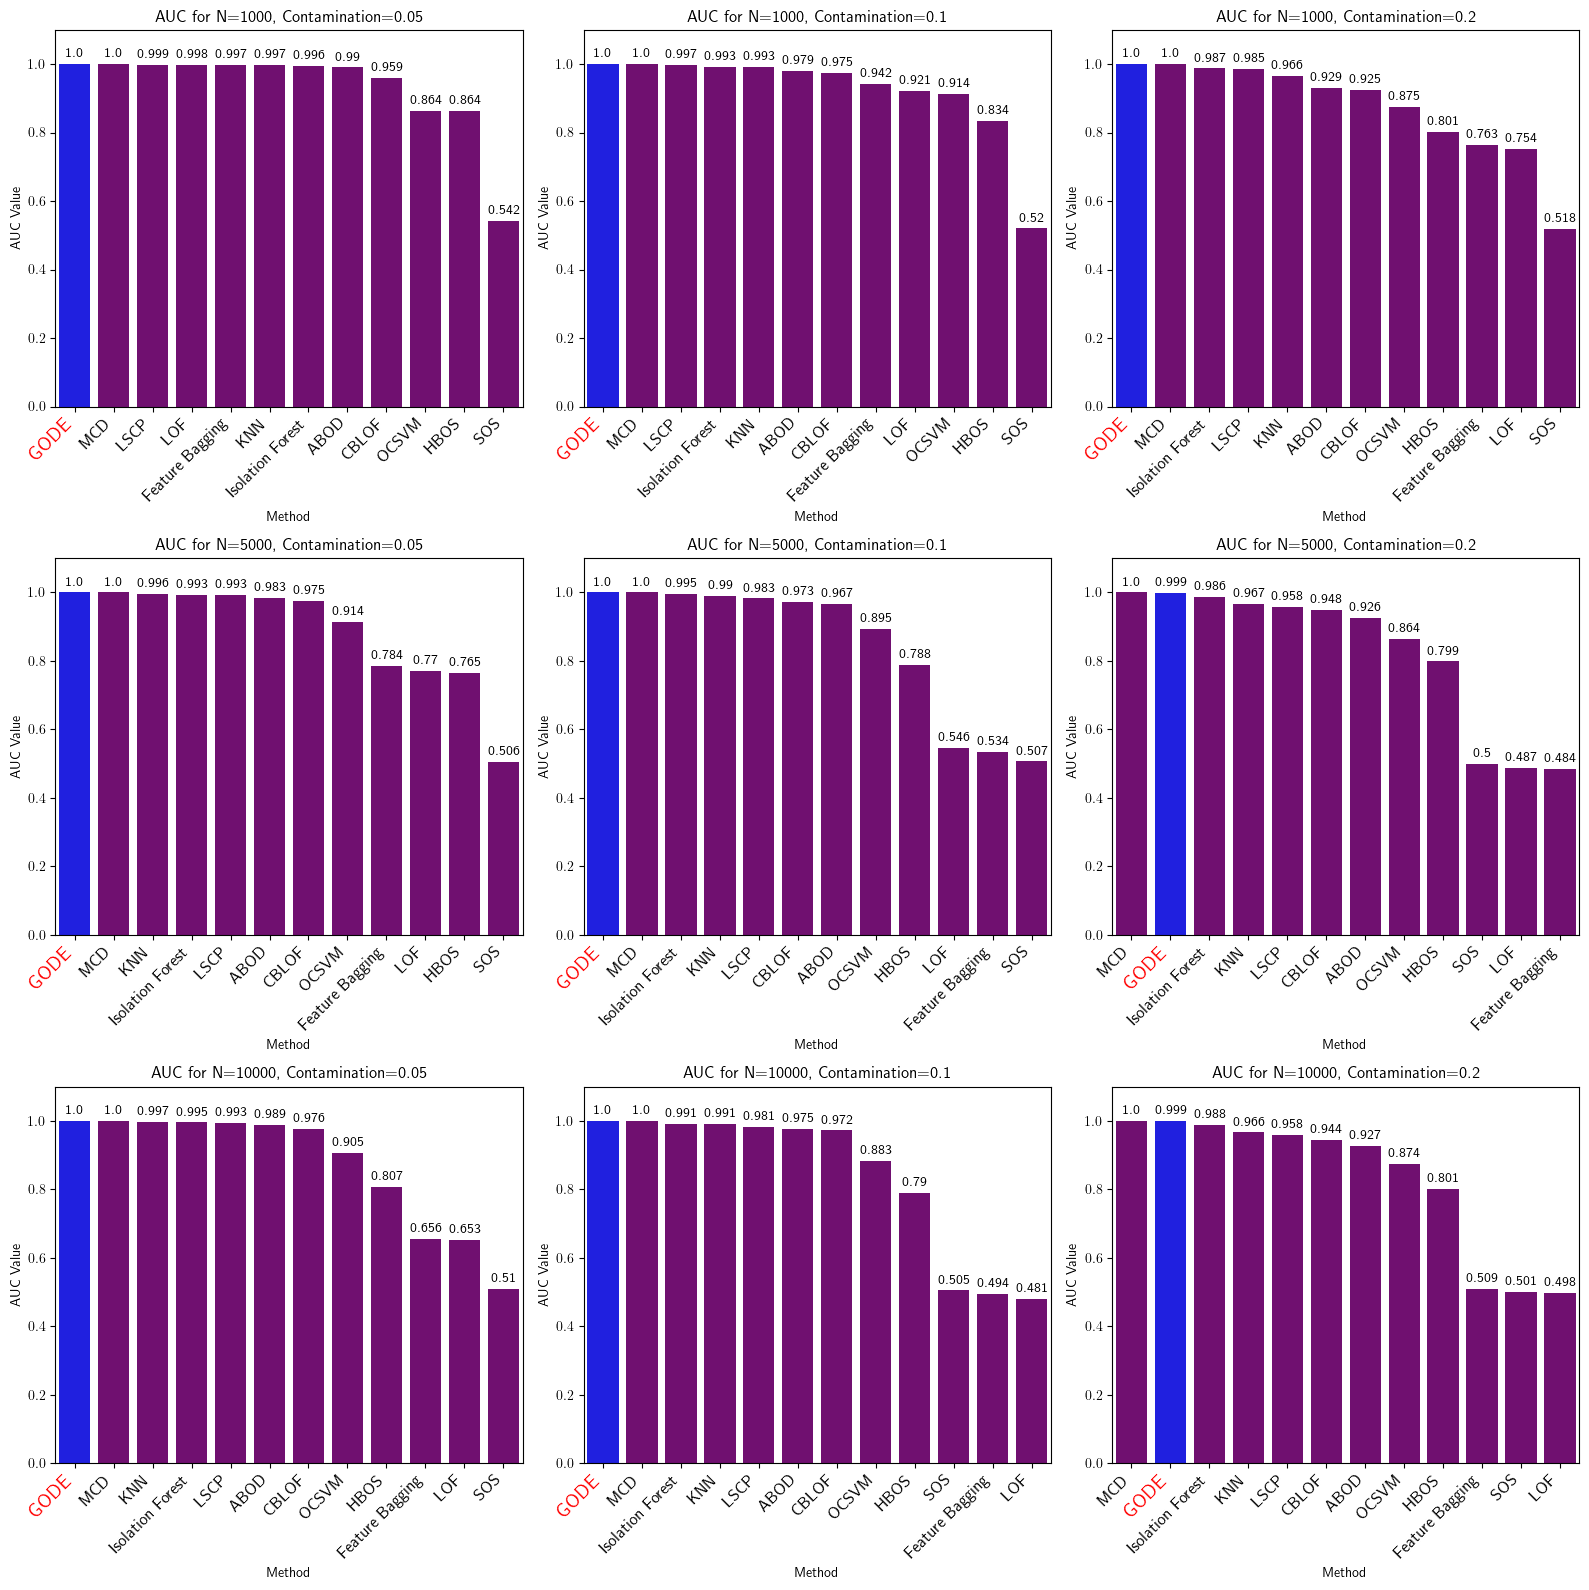

In [48]:
# Adjust the grid size accordingly (3 rows for the 3 sample sizes, 3 columns for the contamination levels)
fig, axs = plt.subplots(3, 3, figsize=(24*(2/3), 24*(2/3)))

highlight_method = 'GODE'

# Define the specific plots where GODE should be placed first
plots_to_reorder = [(0, 1), (1, 0), (1, 1), (2, 1)]  # (row, col) format for 2, 4, 5, 8

# Loop over each combination of filtered sample size and contamination to create subplots
for i, n in enumerate(filtered_ns):
    for j, contamination in enumerate(filtered_contaminations):
        # Filter the data by N and Contamination
        df_subset = df_linear[(df_linear['N'] == n) & (df_linear['Contamination'] == contamination)]
        
        # Sort by AUC first, then by method name, ensuring GODE is first if needed
        df_subset = df_subset.sort_values(by=['AUC', 'Method'], ascending=[False, True])
        
        # Check if the current plot needs GODE to be placed first
        if (i, j) in plots_to_reorder:
            df_subset = pd.concat([df_subset[df_subset['Method'] == highlight_method], df_subset[df_subset['Method'] != highlight_method]])
        
        # Determine the correct subplot
        ax = axs[i, j]
        
        # Set up colors, where only GODE gets the blue highlight, and make its label bold red
        colors = ['blue' if method == highlight_method else 'purple' for method in df_subset['Method']]
        
        # Plot AUC with labels, and assign color based on method
        sns.barplot(x='Method', y='AUC', data=df_subset, ax=ax, dodge=False, palette=colors)
        
        # Add text labels for AUC values
        for k in range(len(df_subset)):
            ax.text(k, df_subset['AUC'].values[k] + 0.02, round(df_subset['AUC'].values[k], 3), ha='center')
        
        # Customize the x-tick labels, making GODE bold and red
        xtick_labels = []
        for method in df_subset['Method']:
            if method == highlight_method:
                xtick_labels.append(f"GODE")
            else:
                xtick_labels.append(method)
        ax.set_xticks(range(len(xtick_labels)))
        ax.set_xticklabels(xtick_labels, rotation=45, ha='right', fontsize=12)
        
        for label in ax.get_xticklabels():
            if label.get_text() == "GODE":
                label.set_color("red")
                label.set_fontweight("extra bold")
                label.set_fontsize(14)
        
        ax.set_title(f'AUC for N={int(n)}, Contamination={contamination}')
        ax.set_ylabel('AUC Value')
        ax.set_ylim(0, 1.1)

plt.tight_layout()

# Save the figure as a PDF
pdf_filename = "./Dropbox/03_Yechan3/연구/서연이랑/GODE/Linear_Dataset.pdf"
plt.savefig(pdf_filename, format='pdf')

# Return the filename for reference
pdf_filename

# Orbit

In [89]:
filtered_contaminations

[0.05, 0.1, 0.2]

In [90]:
# Adjust the grid size accordingly (3 rows for the 3 sample sizes, 3 columns for the contamination levels)
fig, axs = plt.subplots(3, 3, figsize=(24*(2/3), 24*(2/3)))

highlight_method = 'GODE'

# Define the specific plots where GODE should be placed first
plots_to_reorder = [(0, 1), (1, 0), (1, 1), (2, 1)]  # (row, col) format for 2, 4, 5, 8

contaminations = [0.01, 0.05, 0.10]

# Loop over each combination of filtered sample size and contamination to create subplots
for i, n in enumerate(filtered_ns):
    for j, contamination in enumerate(contaminations):
        # Filter the data by N and Contamination
        df_subset = df_orbit[(df_orbit['N'] == n) & (df_orbit['Contamination'] == contamination)]
        
        # Sort by AUC first, then by method name, ensuring GODE is first if needed
        df_subset = df_subset.sort_values(by=['AUC', 'Method'], ascending=[False, True])
        
        # Check if the current plot needs GODE to be placed first
        if (i, j) in plots_to_reorder:
            df_subset = pd.concat([df_subset[df_subset['Method'] == highlight_method], df_subset[df_subset['Method'] != highlight_method]])
        
        # Determine the correct subplot
        ax = axs[i, j]
        
        # Set up colors, where only GODE gets the blue highlight, and make its label bold red
        colors = ['blue' if method == highlight_method else 'purple' for method in df_subset['Method']]
        
        # Plot AUC with labels, and assign color based on method
        sns.barplot(x='Method', y='AUC', data=df_subset, ax=ax, dodge=False, palette=colors)
        
        # Add text labels for AUC values
        for k in range(len(df_subset)):
            ax.text(k, df_subset['AUC'].values[k] + 0.02, round(df_subset['AUC'].values[k], 3), ha='center')
        
        # Customize the x-tick labels, making GODE bold and red
        xtick_labels = []
        for method in df_subset['Method']:
            if method == highlight_method:
                xtick_labels.append(f"GODE")
            else:
                xtick_labels.append(method)
        ax.set_xticks(range(len(xtick_labels)))
        ax.set_xticklabels(xtick_labels, rotation=45, ha='right', fontsize=12)
        
        for label in ax.get_xticklabels():
            if label.get_text() == "GODE":
                label.set_color("red")
                label.set_fontweight("extra bold")
                label.set_fontsize(14)
        
        ax.set_title(f'AUC for N={int(n)}, Contamination={contamination}')
        ax.set_ylabel('AUC Value')
        ax.set_ylim(0, 1.1)

plt.tight_layout()

# Save the figure as a PDF
pdf_filename = "./Dropbox/03_Yechan3/연구/서연이랑/GODE/Orbit_Dataset.pdf"
plt.savefig(pdf_filename, format='pdf')

# Return the filename for reference
pdf_filename

/tmp/ipykernel_497972/3937110979.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='AUC', data=df_subset, ax=ax, dodge=False, palette=colors)
/tmp/ipykernel_497972/3937110979.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='AUC', data=df_subset, ax=ax, dodge=False, palette=colors)
/tmp/ipykernel_497972/3937110979.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='AUC', data=df_subset, ax=ax, dodge=False, palette=colors)
/tmp/ipykernel_497972/3937110979.py:31: FutureWarning: 

Passing `pale